### OCI Data Science - Useful Tips
Everything stored in the <span style="background-color: #d5d8dc ">/home/datascience</span> folder is now stored on your block volume drive. The <span style="background-color: #d5d8dc ">ads-examples</span> folder has moved outside of your working space. Notebook examples are now accessible through a Launcher tab "Notebook Examples" button.
<details>
<summary><font size="2">1. Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">2. OCI Configuration and Key Files Set Up</font></summary><p>Follow the instructions in the getting-started notebook. That notebook is accessible via the "Getting Started" Launcher tab button.</p>
</details>
<details>
<summary><font size="2">3. Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">4. Typical Cell Imports and Settings</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">5. Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [2]:
!pip install plotnine

     |████████████████████████████████| 4.4 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 9.5 MB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 7.3 MB/s eta 0:00:01     |███▋                            | 1.1 MB 7.3 MB/s eta 0:00:02
     |████████████████████████████████| 111 kB 58.5 MB/s eta 0:00:01
ERROR: ads 0+untagged.4506.g5075d66 has requirement pandas==0.24.2, but you'll have pandas 1.1.3 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.1
    Uninstalling statsmodels-0.10.1:
      Successfully uninstalled statsmodels-0.10.1


In [35]:
import seaborn as sns
import time, datetime

In [36]:
from plotnine import *

In [37]:
air_status = pd.read_csv('air_status.csv')
sites = pd.read_csv('site.csv')
codes = pd.read_csv('codes.csv')
data_dict = pd.read_csv('codes.csv')

In [38]:
air_status.columns

Index(['SITE_ID', 'DATEON', 'DATEOFF', 'TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg',
       'Na', 'K', 'Cl', 'NSO4', 'NHNO3', 'WSO2', 'TOTAL_SO2', 'TOTAL_NO3',
       'FLOW_VOLUME', 'VALID_HOURS', 'COMMENT_CODES', 'STD2LOCAL_CF',
       'TEMP_SOURCE', 'QA_CODE', 'UPDATE_DATE'],
      dtype='object')

In [39]:
air_status.SITE_ID.value_counts()

JOT403    1089
PIN414    1067
YOS404    1062
LAV410    1049
DEV412     635
SEK430     555
CON186     378
SEK402     324
Name: SITE_ID, dtype: int64

In [40]:
jot403 = air_status[air_status.SITE_ID=='JOT403']

In [47]:
PIN414 = air_status[air_status.SITE_ID=='PIN414']

In [49]:
SEK402 = air_status[air_status.SITE_ID=='SEK402']

In [52]:
CON186 = air_status[air_status.SITE_ID=='CON186']

In [54]:
SEK430 = air_status[air_status.SITE_ID=='SEK430']

In [57]:
DEV412 = air_status[air_status.SITE_ID=='DEV412']

In [ ]:
sns.barplot(x=,data = jot403)

In [41]:
sns.barplot(data=jot403,x='DATEON')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

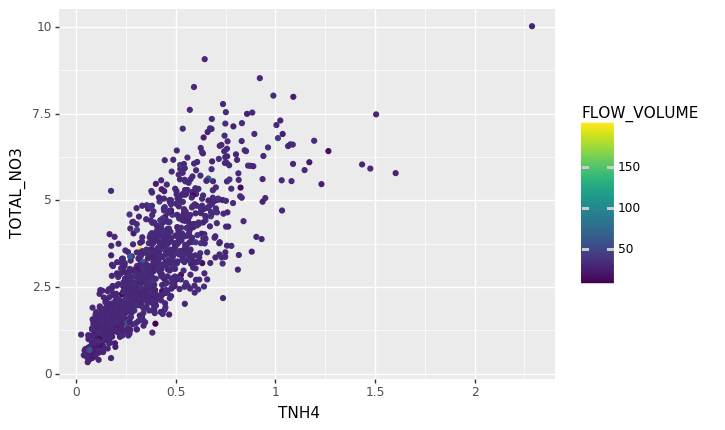

<ggplot: (-9223363250399729611)>

In [46]:
ggplot(data=jot403) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

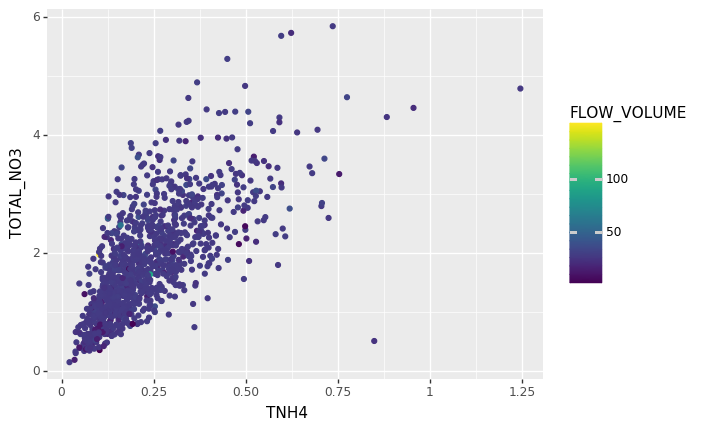

<ggplot: (8786455046173)>

In [48]:
ggplot(data=PIN414) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

In [ ]:
ggplot(data=SEK402) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

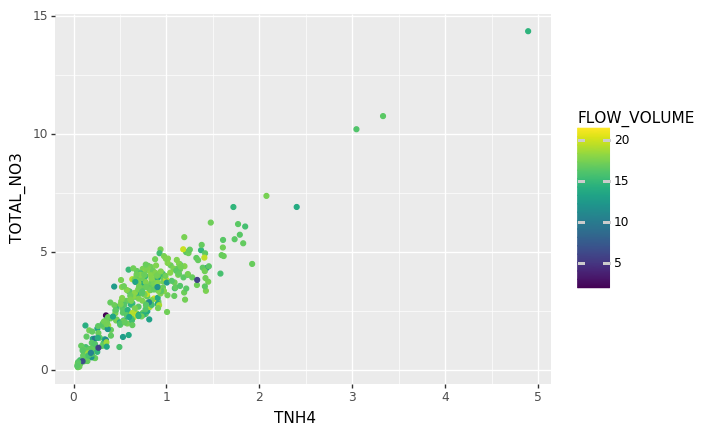

<ggplot: (-9223363250399804728)>

In [51]:
ggplot(data=SEK402) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

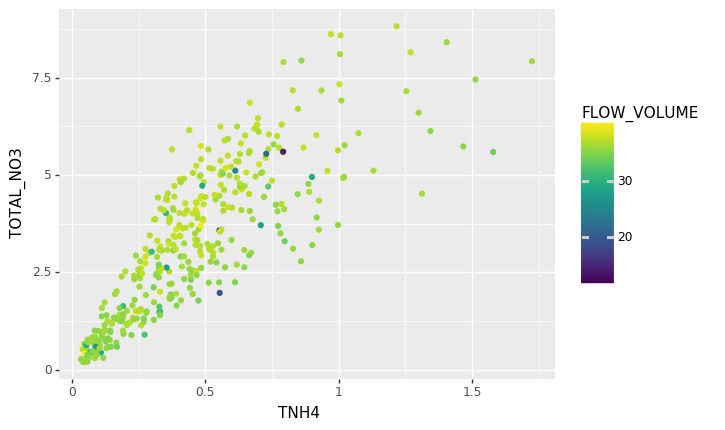

<ggplot: (-9223363250399846035)>

In [53]:
ggplot(data=CON186) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

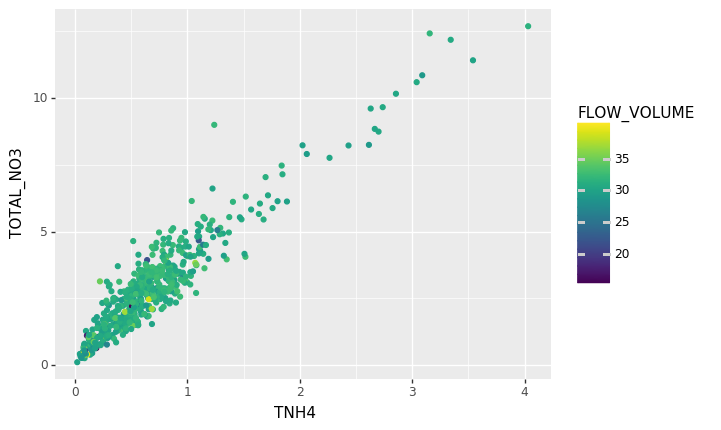

<ggplot: (-9223363250399948982)>

In [56]:
ggplot(data=SEK430) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

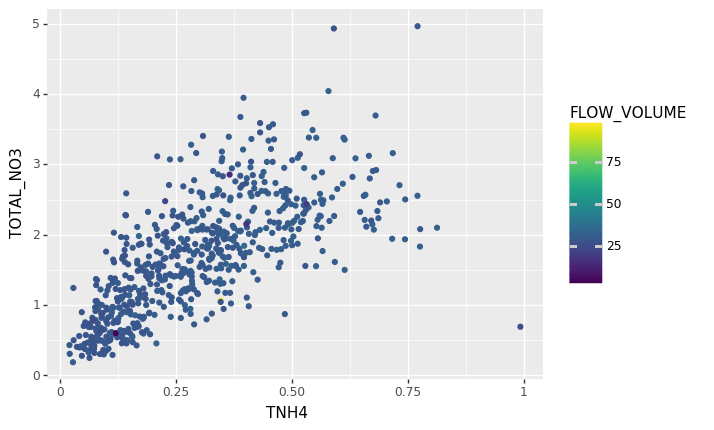

<ggplot: (8786461964215)>

In [60]:
ggplot(data=DEV412) + geom_point(aes(x='TNH4',y='TOTAL_NO3',color='FLOW_VOLUME'))

In [ ]:
ggplot(data=air_status) + geom_point(aes(x='TNH4',y='TNO3')) 

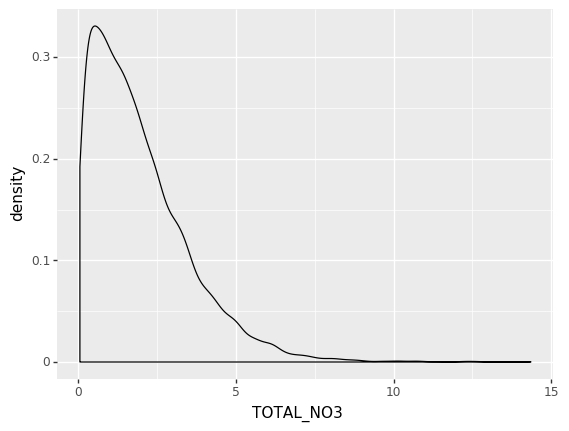

<ggplot: (8786460575443)>

In [23]:
ggplot(air_status, aes(x='TOTAL_NO3')) + geom_density(alpha=1)

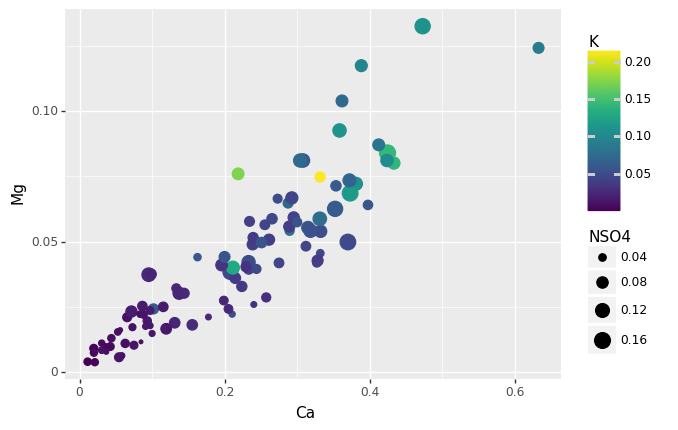

<ggplot: (-9223363250393899050)>

In [19]:
ggplot( aes(x='Ca',y='Mg',color='K',size='NSO4'),data=air_status[:100]) + geom_point()